Step 1: Import Libraries & Load MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Train images: {x_train.shape}")  # (60000, 28, 28)
print(f"Train labels: {y_train.shape}")  # (60000,)
print(f"Test images:  {x_test.shape}")
print(f"Class labels: {np.unique(y_train)}")

TensorFlow version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images:  (10000, 28, 28)
Class labels: [0 1 2 3 4 5 6 7 8 9]


Step 2: Preprocess Data for TensorFlow
TensorFlow CNNs expect:

Input shape: (batch, height, width, channels)
Pixel values: float32 in [0, 1] (normalized)

In [2]:
# Reshape: add channel dimension (grayscale → 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels (for categorical crossentropy)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("✅ Data reshaped and normalized")
print("Train shape:", x_train.shape)  # (60000, 28, 28, 1)
print("Label shape:", y_train.shape) # (60000, 10)

✅ Data reshaped and normalized
Train shape: (60000, 28, 28, 1)
Label shape: (60000, 10)


Step 3: Visualize Sample Digits

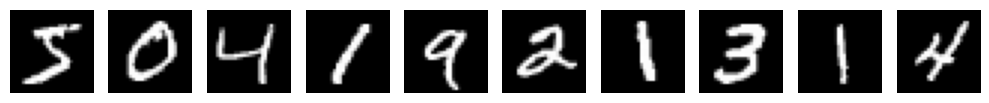

In [3]:
# Plot first 10 digits
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

STEP 4: Build CNN Model in Keras

You’ll see:

Conv2D: learns visual patterns (edges, curves)
MaxPooling: reduces spatial size
Dense: final classifr
📌 Key: Input shape = (28, 28, 1) — matches your preprocessed data.

In [4]:
# Define model
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show architecture
model.summary()

C:\Users\PRINCE COMPUTER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

STEP 5: Train the Model
 You’ll see accuracy improving each epoch.

Typical result after 5 epochs:

Training accuracy: ~98%
Test accuracy: ~98%
💡 This proves your model learns meaningful features — not just memorizing.

In [5]:
# Train for 5 epochs (fast but meaningful)
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8275 - loss: 0.6333 - val_accuracy: 0.9771 - val_loss: 0.0726
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9762 - loss: 0.0766 - val_accuracy: 0.9835 - val_loss: 0.0527
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9830 - loss: 0.0555 - val_accuracy: 0.9862 - val_loss: 0.0407
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9867 - loss: 0.0416 - val_accuracy: 0.9859 - val_loss: 0.0416
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9884 - val_loss: 0.0350


In [ ]:
Setp 6: Evaluate & Plot Results

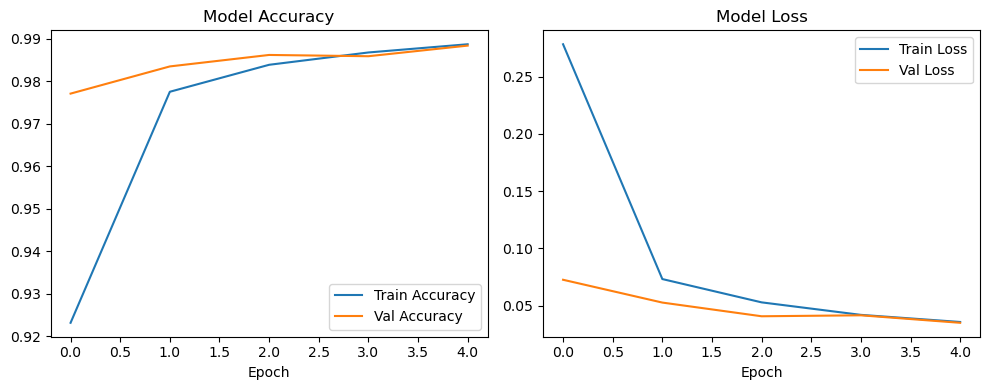


🎯 Final Test Accuracy: 0.9884 (98.84%)


In [6]:
# Plot training history
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Final test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n🎯 Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")